In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import os
import pandas as pd
import scipy.stats
import xesmf as xe
import sys
sys.path.insert(1, '../')
import my_utils as myf
import importlib
importlib.reload(myf)

<module 'my_utils' from '/gpfsm/dhome/laroach1/analysis/analysis_modelE-so-sst/published/analysis/../my_utils.py'>

In [2]:
datadir = myf.processed_dir+'spatial_trend/tos/1990-2021/'
listds = []
listds.append(xr.open_dataset(datadir+'tos_avg_Omon_OBS-NOAA-ERSSTv5_1990-2021.nc'))
listds.append(xr.open_dataset(datadir+'tos_Omon_GISS-E2-1-G_hist+ssp245_r4i1p1f2_gn_1990-2021.nc'))
listds.append(xr.open_dataset(datadir+'/ensemble_means/tos_Omon_GISS-E2-1-G_historical_CTRLmean_gn_1990-2021.nc'))
listds.append(xr.open_dataset(datadir+'/ensemble_means/tos_Omon_GISS-E2-1-G_historical_MWmean_gn_1990-2021.nc'))
listds.append(xr.open_dataset(datadir+'/ensemble_means/tos_Omon_GISS-E2-1-G_historical_WINDmean_gn_1990-2021.nc'))
listds.append(xr.open_dataset(datadir+'/ensemble_means/tos_Omon_GISS-E2-1-G_historical_WIND&MWmean_gn_1990-2021.nc'))

In [3]:
datadir = myf.processed_dir+'spatial_trend/siconca/1990-2021/'
listsicds = []
listsicds.append(xr.open_dataset(datadir+'OBS_CDRv4_1990-2021.nc'))
listsicds.append(xr.open_dataset(datadir+'siconca_SImon_GISS-E2-1-G_hist+ssp245_r4i1p1f2_gn_1990-2021.nc'))
listsicds.append(xr.open_dataset(datadir+'/ensemble_means/siconca_SImon_GISS-E2-1-G_historical_CTRLmean_gn_1990-2021.nc'))
listsicds.append(xr.open_dataset(datadir+'/ensemble_means/siconca_SImon_GISS-E2-1-G_historical_MWmean_gn_1990-2021.nc'))
listsicds.append(xr.open_dataset(datadir+'/ensemble_means/siconca_SImon_GISS-E2-1-G_historical_WINDmean_gn_1990-2021.nc'))
listsicds.append(xr.open_dataset(datadir+'/ensemble_means/siconca_SImon_GISS-E2-1-G_historical_WIND&MWmean_gn_1990-2021.nc'))

In [4]:
griddir = myf.cmip_dir+'CMIP/NASA-GISS/GISS-E2-1-G/piControl/r1i1p1f1/fx/'
garea = xr.open_dataset(griddir+'areacella/gn/v20180824/areacella_fx_GISS-E2-1-G_piControl_r1i1p1f1_gn.nc').areacella
landfr = xr.open_dataset(griddir+'sftlf/gn/v20180824/sftlf_fx_GISS-E2-1-G_piControl_r1i1p1f1_gn.nc').sftlf
landfr = landfr/100.

In [5]:
mynames = ['OBS','r4i1p1f2','CTRLmean','MELTmean','WINDmean', 'WIND&MWmean']
labels = ['NOAA-ERSSTv5','CTRL - r4i1p1f2','CTRLmean','MWmean','WINDmean','WIND&MWmean']

## Main figure

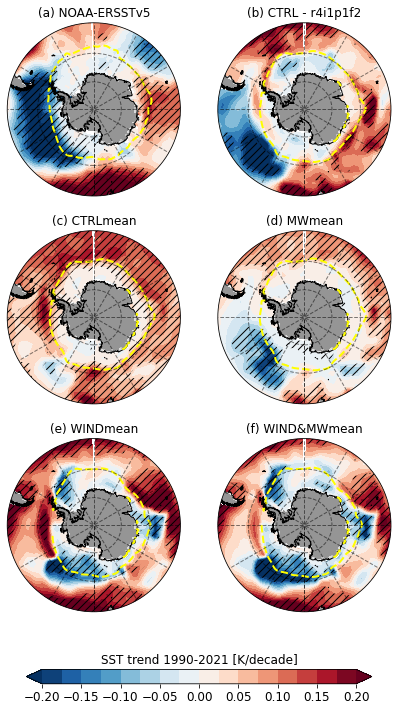

In [6]:
fig = plt.figure(figsize=(6,10))
for n, myds in enumerate(listds):
    ax = myf.spolar_subplot(-45,3,2,1+n)
    ax.pcolormesh(landfr.lon, landfr.lat, landfr, transform=ccrs.PlateCarree(), cmap = plt.cm.Greys, vmin=0,vmax=2)
    CS1 = ax.contourf(myds.lon, myds.lat, 10.*myds.tos_trend, transform=ccrs.PlateCarree(), cmap = plt.cm.RdBu_r,levels = np.arange(-.2,.2025,.025),extend='both')
    ax.contourf(myds.lon, myds.lat, myds.tos_trend_pval, levels = [0,.05], transform=ccrs.PlateCarree(), colors=['none'], hatches=['///'])
    ax.set_title(myf.alphabet[n]+' '+labels[n])
    sicds = listsicds[n]
    ax.contour(sicds.lon, sicds.lat, sicds.siconca_climatology.where(sicds.lat>-68), 
        transform=ccrs.PlateCarree(), levels=[15.],linestyles=['--'],colors=['yellow'],linewidths=[2])

plt.tight_layout()
plt.subplots_adjust(bottom=.15,hspace=.2)
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('SST trend 1990-2021 [K/decade]',fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.show()
fig.savefig('../figs/fig2.pdf',bbox_inches='tight',dpi=300)
plt.close()

## Plot control ensemble over 1979-2021

In [7]:
datadir = myf.processed_dir+'spatial_trend/tos/1979-2021/'
listds = []
gissfiles = sorted([f for f in os.listdir(datadir) if '.nc' in f and ('f1' in f or 'f2' in f or 'NOAA' in f)])
gissfiles = gissfiles[1:10]+[gissfiles[0]]+gissfiles[10:]
for myfile in gissfiles:
    ds = xr.open_dataset(datadir+myfile)
    listds.append(ds)

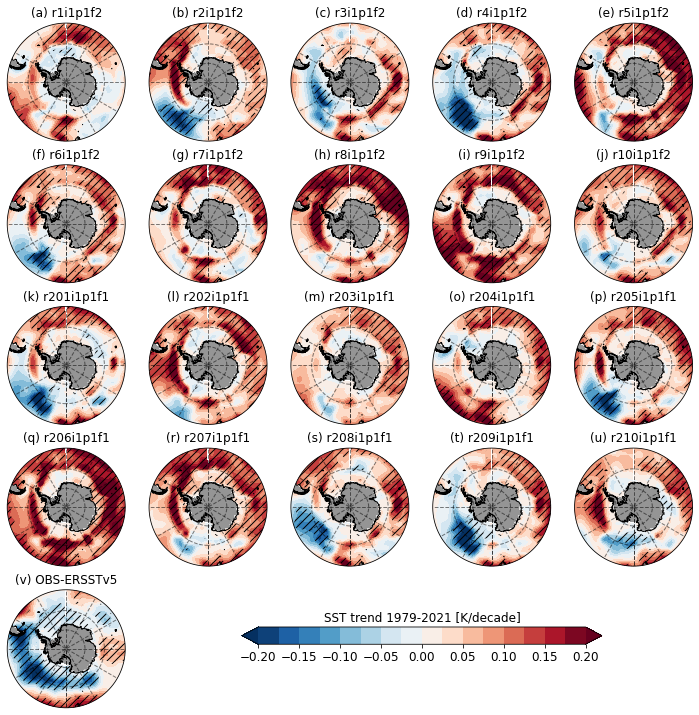

In [8]:
fig = plt.figure(figsize=(10,12))
for n, myds in enumerate(listds):
    ax = myf.spolar_subplot(-45,6,5,1+n)
    label = str(myds.names.values)
    ax.pcolormesh(landfr.lon, landfr.lat, landfr, transform=ccrs.PlateCarree(), cmap = plt.cm.Greys, vmin=0,vmax=2)
    CS1 = ax.contourf(myds.lon, myds.lat, 10.*myds.tos_trend, transform=ccrs.PlateCarree(), cmap = plt.cm.RdBu_r,levels = np.arange(-.2,.2025,.025),extend='both')
    ax.contourf(myds.lon, myds.lat, myds.tos_trend_pval, levels = [0,.05], transform=ccrs.PlateCarree(), colors=['none'], hatches=['///'])
    ax.set_title(myf.alphabet[n]+' '+str(label))

plt.tight_layout()
plt.subplots_adjust(hspace=.2)
cbar_ax = fig.add_axes([0.35, 0.25, 0.5, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('SST trend 1979-2021 [K/decade]',fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.show()
fig.savefig('../figs/figS4.pdf',bbox_inches='tight',dpi=300)
plt.close()

## Plots of spatial masks used for meltwater input

In [9]:
ds_glmelt_extra = xr.open_dataset(myf.processed_dir+'fwdata/fw_288x180.nc')
ds_glmelt = xr.open_dataset(myf.processed_dir+'fwdata/GLMELT_144X90_gas.OCN.nc')

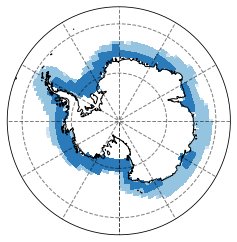

In [10]:
fig = plt.figure(figsize=(4,5))
ax = myf.spolar_subplot(-55,1,1,1)
ax.pcolormesh(landfr.lon, landfr.lat, landfr, transform=ccrs.PlateCarree(), cmap = plt.cm.Greys, vmin=0,vmax=200)
ax.pcolormesh(ds_glmelt_extra.lon, ds_glmelt_extra.lat, ds_glmelt_extra.mask.where(ds_glmelt_extra.mask>0), transform=ccrs.PlateCarree(), 
              cmap = plt.cm.Blues, vmin=0,vmax=2.5)
ax.pcolormesh(ds_glmelt.lon, ds_glmelt.lat, ds_glmelt.mask.where(ds_glmelt.mask>0), transform=ccrs.PlateCarree(), 
              cmap = plt.cm.Blues, vmin=0,vmax=1.4)
plt.show()
fig.savefig('../figs/figS3.pdf',bbox_inches='tight',dpi=300)
plt.close()